# Notes #
1. Hyperparameter tuning
    + Understand what is Hyperparameter tuning
    + Try it on this dataset
    + Model params v/s hyperparams


**Rough notes**  
1. 

---

**Data preparation**

In [3]:
# Data preparation #

# Load CSV using Pandas
import pandas as pd
import numpy as np

X = pd.read_csv("../data/testData2_features.csv", delimiter=",", header=None, index_col=False)
Y = pd.read_csv("../data/testData2_target.csv", delimiter=",", header=None, index_col=False)
X = X.iloc[1:,1:]
Y = Y.iloc[1:,1:]

print("Class distribution")    
print("Class 1 ", Y[1].value_counts()[0] / Y.shape[0] * 100)
print("Class 2 ", Y[1].value_counts()[1] / Y.shape[0] * 100)

# Normalize the X values #
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = sc.fit_transform(X)

Class distribution
Class 1  50.24999999999999
Class 2  49.75


In [5]:
data = pd.concat([X,Y])
data.head()

,1,2,3,4,5,6,7,8,9,10,...,791,792,793,794,795,796,797,798,799,800
1,0.948187,0.445499,-1.092541,-0.710852,-0.507592,-1.480154,1.275768,1.718811,-1.126925,1.188830,...,0.063109,-0.773043,0.398044,0.530467,0.943945,-0.736020,-1.062253,0.248533,1.212871,0.744268
2,0.271939,0.311043,1.332711,-1.272927,-1.204018,1.282129,1.388315,1.047545,0.145111,0.428345,...,-0.036202,0.565793,0.818186,-1.581724,-0.917499,1.096332,-0.498817,1.720521,0.235952,0.597328
3,-0.453835,0.589424,0.007518,-0.587591,0.291467,-0.425945,0.389240,0.277014,0.480564,0.227101,...,-0.254572,-0.265200,-1.019234,-2.032725,-0.849707,-1.188308,0.354988,-0.009973,-0.514984,-0.987903
4,0.622304,0.258363,-0.348337,0.014336,0.229801,0.744302,0.532471,-0.204552,0.688837,-2.890101,...,0.215871,1.064380,0.181352,1.383487,0.826799,0.794994,1.679180,-0.308039,0.157638,0.323596
5,-1.086650,-0.900580,1.480275,-0.455875,0.537903,0.091358,0.073642,1.563687,0.802782,-1.285463,...,1.153435,-0.104798,1.127272,0.375928,-1.052908,1.092579,0.127949,-0.371881,-1.090728,0.034679


---

**Keras Model**

In [2]:
# Keras #

### Logistic regression using DNN ###
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

np.random.seed(7)

# Defining model #

model = Sequential()
model.add(Dense(1,input_dim=800,activation='sigmoid'))

# Compile the model #

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model #

model.fit(x_train, y_train, epochs=40, batch_size=100, verbose=0)

# Evaluate the model #

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Using TensorFlow backend.


480/480 [==============================] - 0s 83us/step

acc: 54.79%


---

**Scikit model**

In [3]:
# Scikit learn #

# Import and create an instance of your model(Logistic regression)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

# Train your model using the training dataset

logisticRegr.fit(x_train,y_train)

# Predict the output 

predictions = logisticRegr.predict(x_test)

score = logisticRegr.score(x_test,y_test)
print(score)


0.6541666666666667


C:\Users\shakk\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---

**Kfold validation**

In [4]:
# Validation #
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy

seed = 7
numpy.random.seed(seed)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, Y):
    # create model
    model = Sequential()
    model.add(Dense(1,input_dim=800,activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    model.fit(X[train], Y.iloc[train], epochs=40, batch_size=100, verbose=0)
    # evaluate the model
    scores = model.evaluate(X[test], Y.iloc[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))


acc: 53.09%
acc: 61.73%
acc: 55.00%
acc: 55.00%
acc: 52.50%
acc: 60.00%
acc: 47.50%
acc: 60.00%
acc: 56.96%
acc: 60.76%
56.25% (+/- 4.27%)


---

**ROC Curve and Confusion matrix**

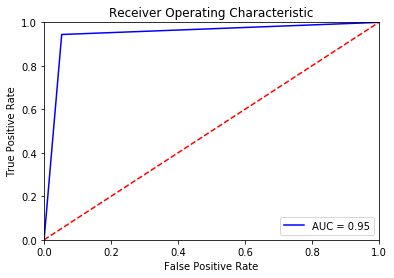

[[234  13]
 [ 13 220]]


In [7]:
# Prediction #
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = (y_pred>0.5)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Creating the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

---

**Classification Report**

In [6]:
from sklearn.metrics import classification_report

target_names = ['Class 1', 'Class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Class 1       0.95      0.95      0.95       247
    Class 2       0.94      0.94      0.94       233

avg / total       0.95      0.95      0.95       480



---

# Pending #
1. 